In [1]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from IPython.display import HTML

import thicket as th
from thicket.model_extrap import Modeling

display(HTML("<style>.container { width:80% !important; }</style>"))

# display all columns from pandas data frames
pd.options.display.max_columns = None

#data = "../../data/LULESH/inclusive/weak"
#data = "../data/mpi_scaling_cali/"
data = "../../data/LULESH/exclusive/weak"
t_ens = th.Thicket.from_caliperreader(data)


In [2]:
#t_ens.metadata

In [3]:
mdl = Modeling(
    t_ens,
    parameters=[
        "jobsize",
        "problem_size",
    ],
    metrics=[
        #"Avg time/rank",
        "Avg time/rank (exc)",
        #"Total time",
    ],
)

mdl.produce_models(use_median=True)

# use the mean values for modeling
#mdl.produce_models(use_median=False)

/usr/WS2/ritter5/thicket/thicket/model_extrap.py:1049: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.0008723621269555281 + 6.556670794889547e-08 * q^(5/2) * log2(q)^(2) + 2.2018661683366933e-09 * log2(p)^(1) * q^(5/2) * log2(q)^(2)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  self.tht.statsframe.dataframe.at[


In [4]:
#t_ens.statsframe.dataframe["Avg time/rank (exc)_extrap-model"].iloc[0].mdl.hypothesis.function

In [5]:
pd.set_option('display.max_colwidth', None)
t_ens.statsframe.dataframe

,name,Avg time/rank (exc)_extrap-model,Avg time/rank (exc)_RSS_extrap-model,Avg time/rank (exc)_rRSS_extrap-model,Avg time/rank (exc)_SMAPE_extrap-model,Avg time/rank (exc)_AR2_extrap-model,Avg time/rank (exc)_RE_extrap-model
node,,,,,,,
"{'name': 'main', 'type': 'function'}",main,0.0008723621269555281 + 6.556670794889547e-08 * q^(5/2) * log2(q)^(2) + 2.2018661683366933e-09 * log2(p)^(1) * q^(5/2) * log2(q)^(2),4.545651e-06,9.560068e-02,4.143238e+00,0.999368,4.207879e-02
"{'name': 'CommRecv', 'type': 'function'}",CommRecv,-0.000916845075169404 + 0.00013207214621234996 * p^(1/4) * log2(p)^(1) + 2.809247210904355e-06 * p^(1/4) * log2(p)^(1) * q^(4/3) * log2(q)^(1),4.699463e-05,2.225059e-01,4.618548e+00,0.997751,4.206873e-02
"{'name': 'MPI_Irecv', 'type': 'function'}",MPI_Irecv,-3.694448435684417e-05 + 0.00010236746698056308 * p^(1/3) * log2(p)^(1) + 4.993560605185223e-07 * p^(1/3) * log2(p)^(1) * q^(9/4),3.065328e-04,1.609175e-01,5.962332e+00,0.995421,5.974494e-02
"{'name': 'CommSend', 'type': 'function'}",CommSend,-0.013269542914737874 + -0.0006974651117501947 * log2(p)^(2) + 1.1147034206413723e-07 * log2(p)^(2) * q^(5/2) * log2(q)^(2),3.979377e-02,5.447100e+01,4.807122e+01,0.998902,6.571273e-01
"{'name': 'MPI_Isend', 'type': 'function'}",MPI_Isend,-0.029810486435397646 + -0.00024325604279878865 * q^(4/3) + 0.00023557706176343947 * p^(1/2) * q^(4/3),1.531217e-02,6.158689e+01,4.175652e+01,0.984432,5.861059e-01
"{'name': 'MPI_Waitall', 'type': 'function'}",MPI_Waitall,-2.993047362197782 + 0.01679272712164168 * q^(7/4),4.500671e+02,2.757835e+06,1.052972e+02,0.641238,8.983140e+01
"{'name': 'CommSBN', 'type': 'function'}",CommSBN,-0.36836996636511166 + 0.0006996298350725823 * p^(1/4) * q^(5/4) * log2(q)^(1),2.246769e+00,1.190701e+04,9.561341e+01,0.812775,7.742993e+00
"{'name': 'MPI_Wait', 'type': 'function'}",MPI_Wait,-1.1471022954141077 + 0.6548877772303067 * q^(1/4),5.233963e+00,1.493940e+02,7.484738e+01,0.162564,1.497320e+00
"{'name': 'MPI_Barrier', 'type': 'function'}",MPI_Barrier,0.0005513733934445902 + 6.196119933596664e-06 * q^(7/4),8.894561e-05,2.190530e+02,4.904663e+01,0.549665,1.313327e+00


<Figure size 432x288 with 0 Axes>

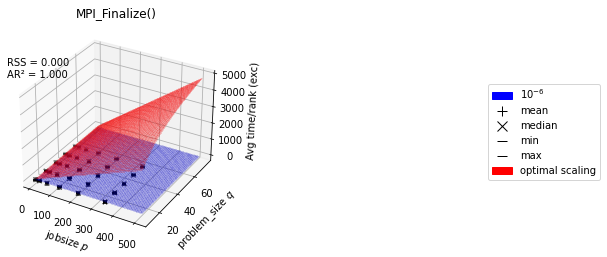

In [6]:
model_obj = t_ens.statsframe.dataframe.at[t_ens.statsframe.dataframe.index[51], "Avg time/rank (exc)_extrap-model"]

len(t_ens.statsframe.dataframe)

plt.clf()
fig, ax = model_obj.display(show_mean=True, show_median=True, 
                            show_min_max=True, RSS=True, 
                            AR2=True, show_opt_scaling=True,
                            opt_scaling_func="1.5*p**1*log2(q)**1")
 
# Plot graph
plt.show()


,Avg time/rank (exc)_extrap-model
node,
"{'name': 'main', 'type': 'function'}",
"{'name': 'CommRecv', 'type': 'function'}",
"{'name': 'MPI_Irecv', 'type': 'function'}",
"{'name': 'CommSend', 'type': 'function'}",
"{'name': 'MPI_Isend', 'type': 'function'}",
"{'name': 'MPI_Waitall', 'type': 'function'}",
"{'name': 'CommSBN', 'type': 'function'}",
"{'name': 'MPI_Wait', 'type': 'function'}",
"{'name': 'MPI_Barrier', 'type': 'function'}",

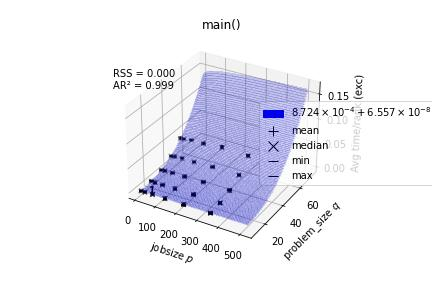
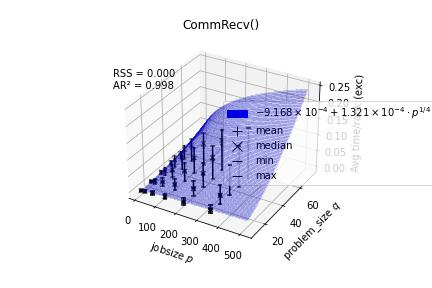
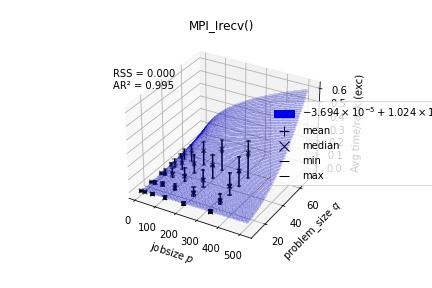
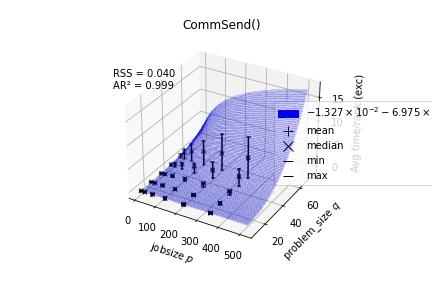
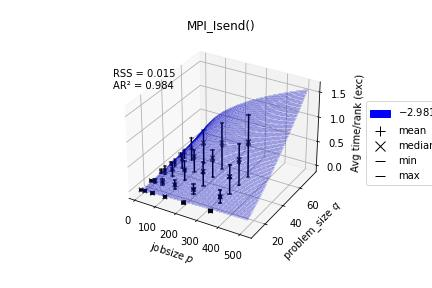
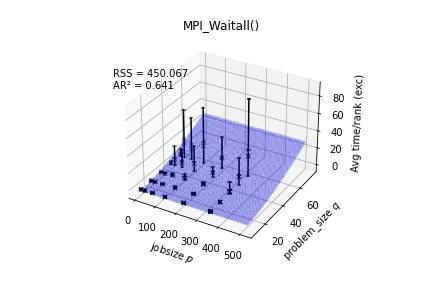
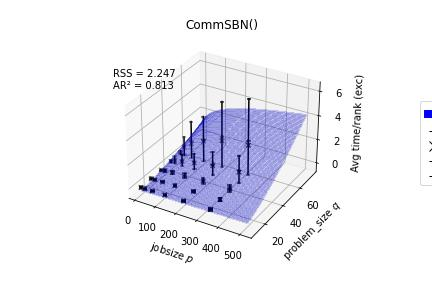
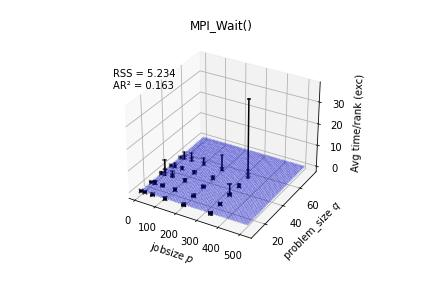
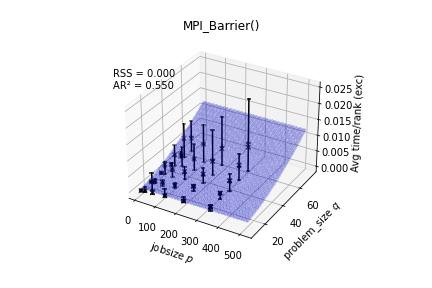
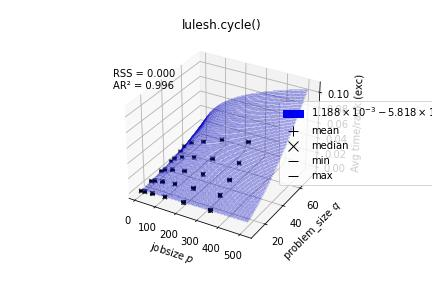
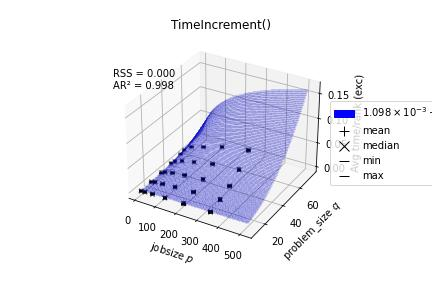
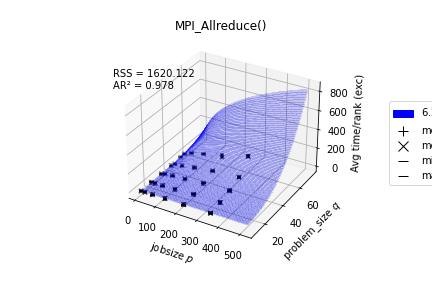
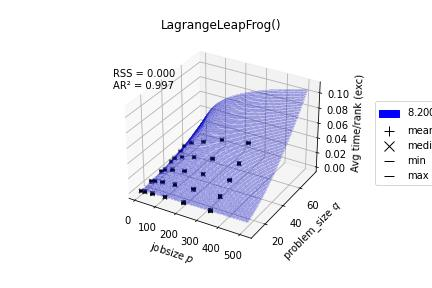
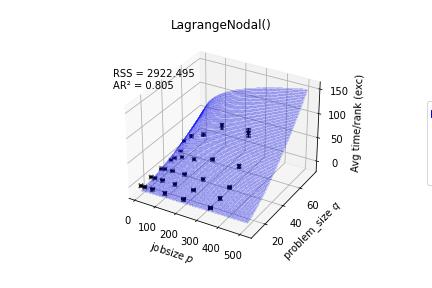
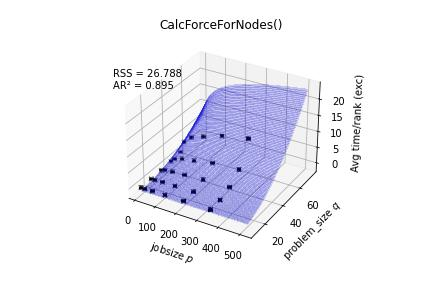
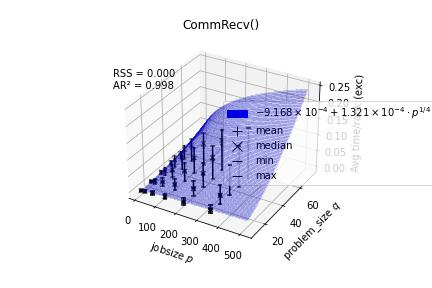
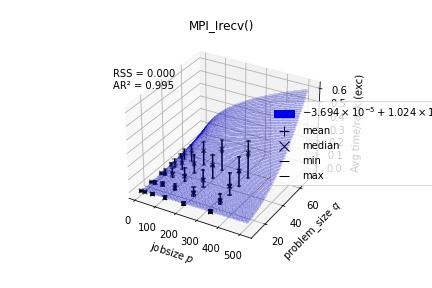
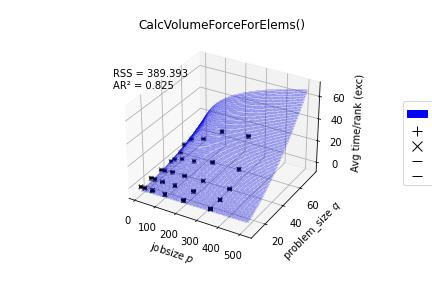
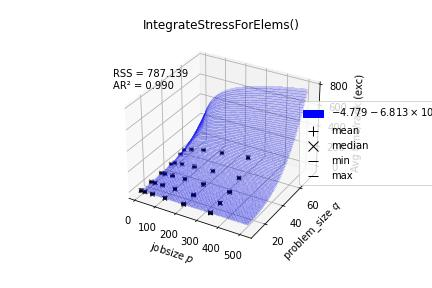
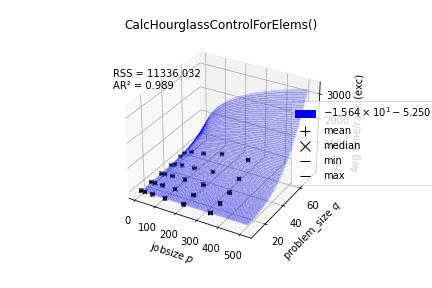
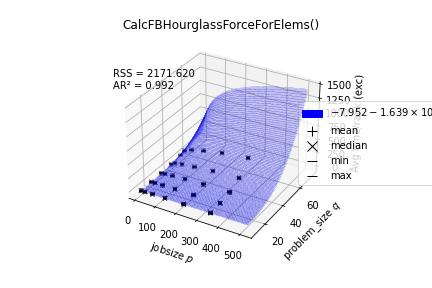
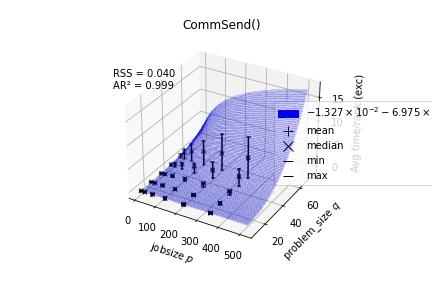
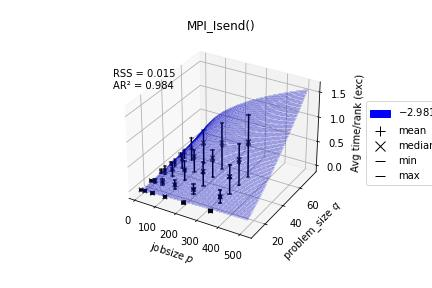
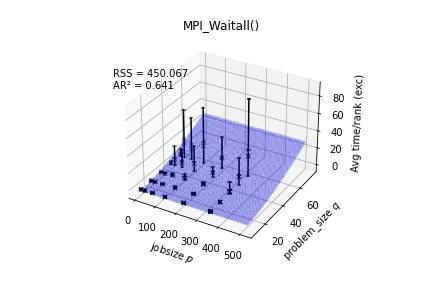
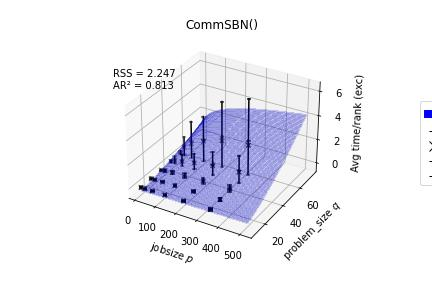
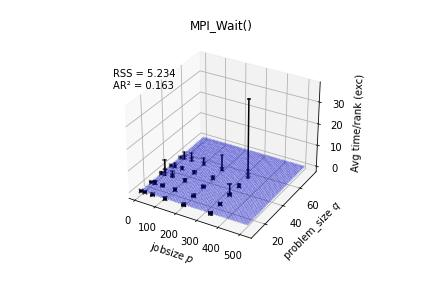
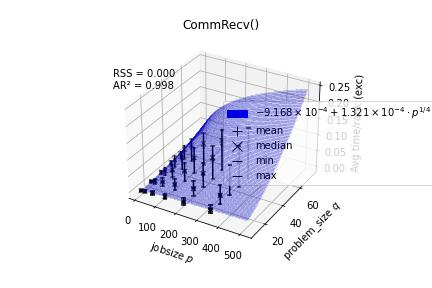
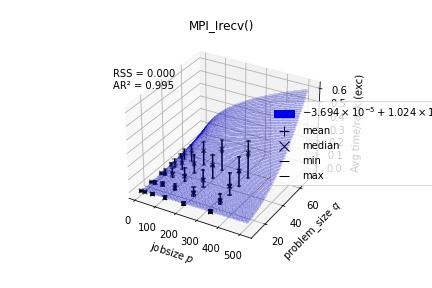
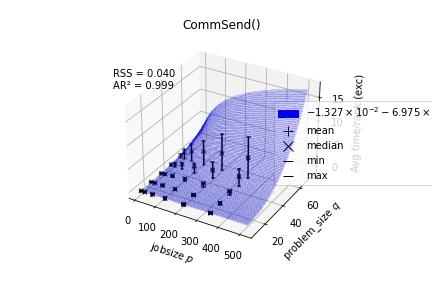
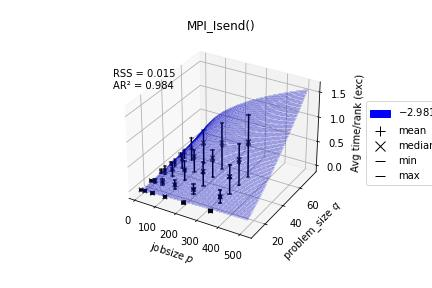
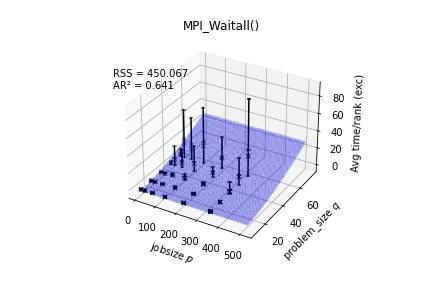
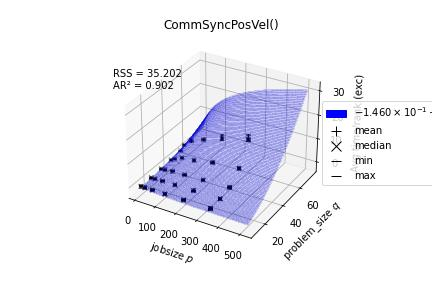
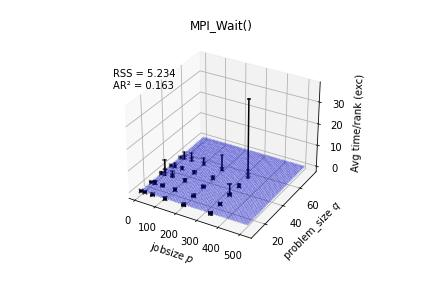
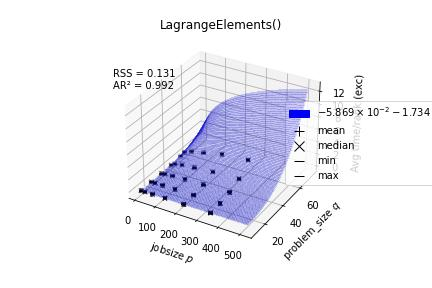
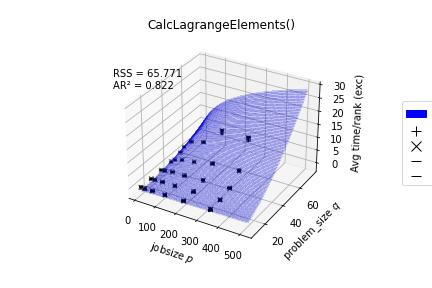
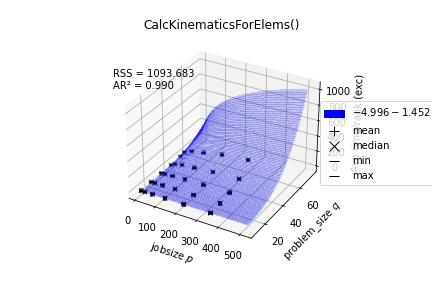
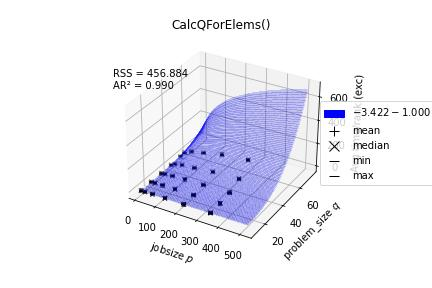
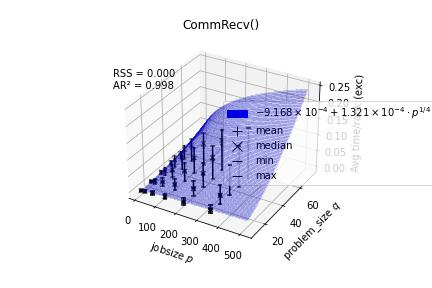
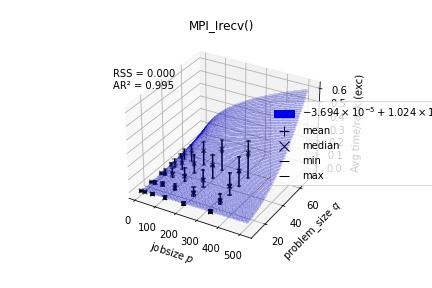
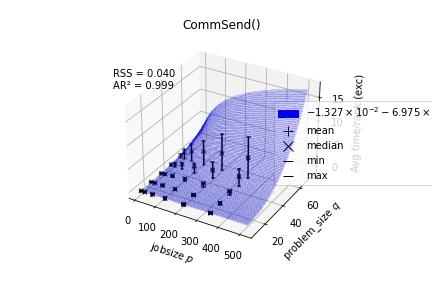
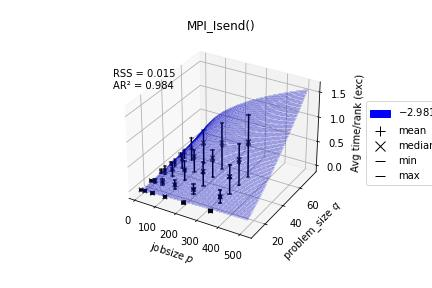
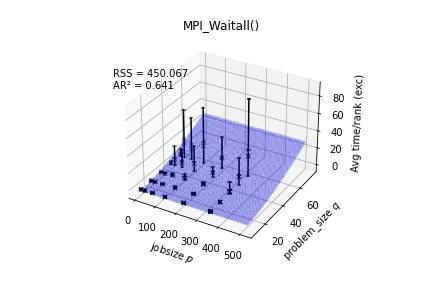
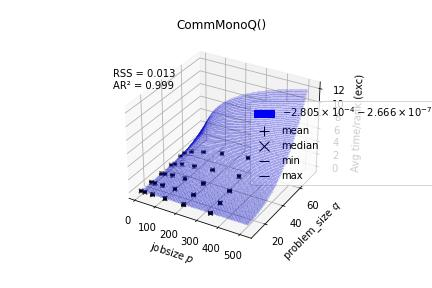
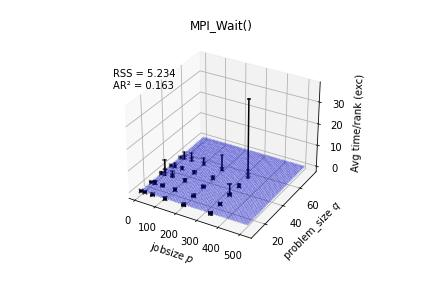
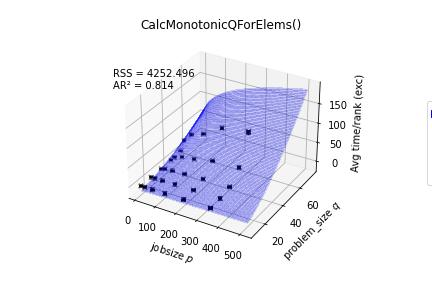
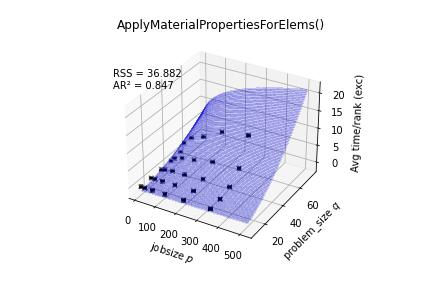
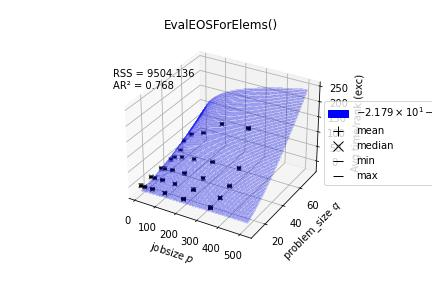
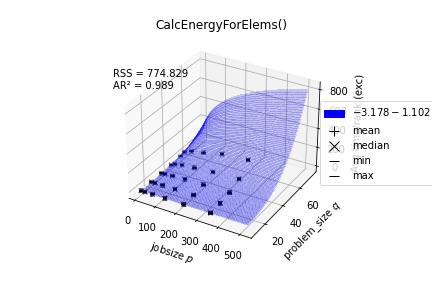
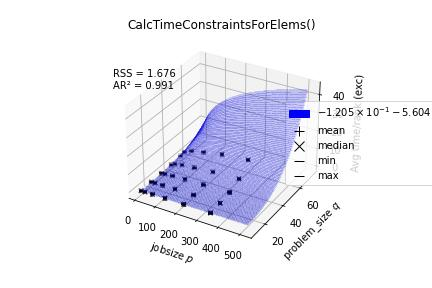
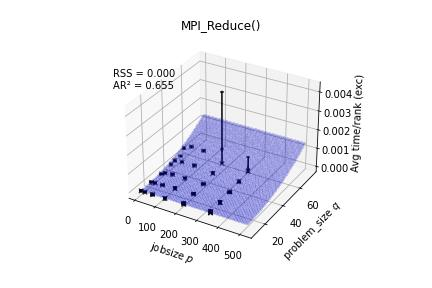
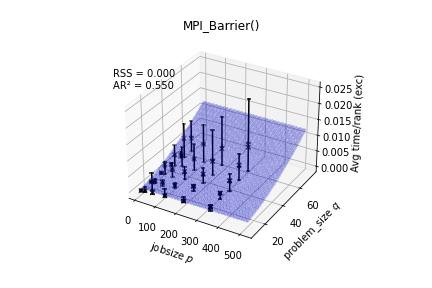
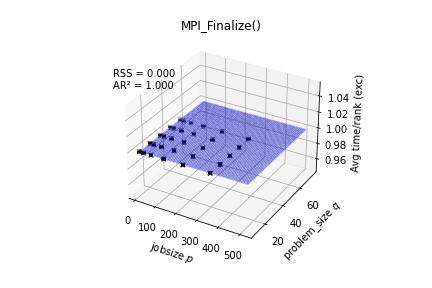
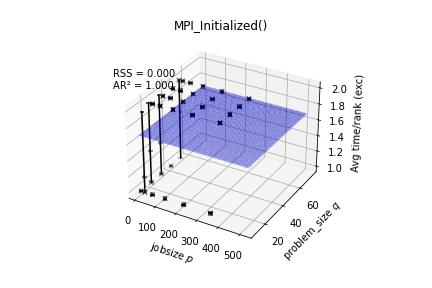
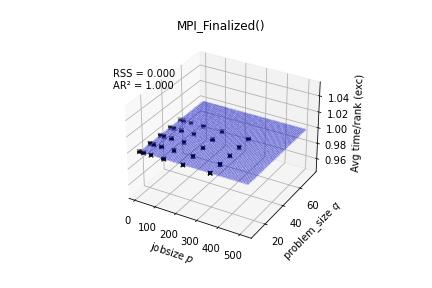
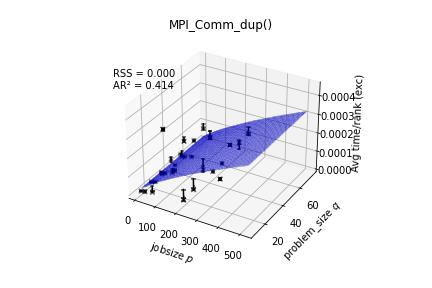

In [7]:
with pd.option_context("display.max_colwidth", 1):
    display(HTML(mdl.to_html(show_mean=True, show_median=True, 
                            show_min_max=True, RSS=True, 
                            AR2=True, show_opt_scaling=False)))


In [8]:
mdl.componentize_statsframe()

xp_comp_df = t_ens.statsframe.dataframe

xp_comp_df

,name,Avg time/rank (exc)_extrap-model,Avg time/rank (exc)_RSS_extrap-model,Avg time/rank (exc)_rRSS_extrap-model,Avg time/rank (exc)_SMAPE_extrap-model,Avg time/rank (exc)_AR2_extrap-model,Avg time/rank (exc)_RE_extrap-model,"(Avg time/rank (exc)_extrap-model, c)","(Avg time/rank (exc)_extrap-model, q^(5/2) * log2(q)^(2))","(Avg time/rank (exc)_extrap-model, log2(p)^(1) * q^(5/2) * log2(q)^(2))","(Avg time/rank (exc)_extrap-model, p^(1/4) * log2(p)^(1))","(Avg time/rank (exc)_extrap-model, p^(1/4) * log2(p)^(1) * q^(4/3) * log2(q)^(1))","(Avg time/rank (exc)_extrap-model, p^(1/3) * log2(p)^(1))","(Avg time/rank (exc)_extrap-model, p^(1/3) * log2(p)^(1) * q^(9/4))","(Avg time/rank (exc)_extrap-model, log2(p)^(2))","(Avg time/rank (exc)_extrap-model, log2(p)^(2) * q^(5/2) * log2(q)^(2))","(Avg time/rank (exc)_extrap-model, q^(4/3))","(Avg time/rank (exc)_extrap-model, p^(1/2) * q^(4/3))","(Avg time/rank (exc)_extrap-model, q^(7/4))","(Avg time/rank (exc)_extrap-model, p^(1/4) * q^(5/4) * log2(q)^(1))","(Avg time/rank (exc)_extrap-model, q^(1/4))","(Avg time/rank (exc)_extrap-model, q^(4/3) * log2(q)^(1))","(Avg time/rank (exc)_extrap-model, p^(1/3) * q^(4/3) * log2(q)^(1))","(Avg time/rank (exc)_extrap-model, log2(p)^(2) * q^(9/4))","(Avg time/rank (exc)_extrap-model, q^(3))","(Avg time/rank (exc)_extrap-model, p^(1/3) * q^(3))","(Avg time/rank (exc)_extrap-model, q^(5/3))","(Avg time/rank (exc)_extrap-model, p^(1/4) * q^(5/3))","(Avg time/rank (exc)_extrap-model, p^(1/4) * q^(4/3) * log2(q)^(1))","(Avg time/rank (exc)_extrap-model, log2(p)^(1) * q^(2))","(Avg time/rank (exc)_extrap-model, q^(3) * log2(q)^(1))","(Avg time/rank (exc)_extrap-model, log2(p)^(1) * q^(3) * log2(q)^(1))","(Avg time/rank (exc)_extrap-model, p^(1/4) * q^(3) * log2(q)^(1))","(Avg time/rank (exc)_extrap-model, log2(p)^(2) * q^(7/4))","(Avg time/rank (exc)_extrap-model, p^(1/3) * q^(5/3))","(Avg time/rank (exc)_extrap-model, p^(1/4) * q^(7/4))","(Avg time/rank (exc)_extrap-model, p^(1/4))","(Avg time/rank (exc)_extrap-model, q^(2) * log2(q)^(2))","(Avg time/rank (exc)_extrap-model, p^(1/2) * log2(p)^(2))"
node,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"{'name': 'main', 'type': 'function'}",main,0.0008723621269555281 + 6.556670794889547e-08 * q^(5/2) * log2(q)^(2) + 2.2018661683366933e-09 * log2(p)^(1) * q^(5/2) * log2(q)^(2),4.545651e-06,9.560068e-02,4.143238e+00,0.999368,4.207879e-02,0.000872,6.556671e-08,2.201866e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"{'name': 'CommRecv', 'type': 'function'}",CommRecv,-0.000916845075169404 + 0.00013207214621234996 * p^(1/4) * log2(p)^(1) + 2.809247210904355e-06 * p^(1/4) * log2(p)^(1) * q^(4/3) * log2(q)^(1),4.699463e-05,2.225059e-01,4.618548e+00,0.997751,4.206873e-02,-0.000917,NaN,NaN,0.000132,0.000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"{'name': 'MPI_Irecv', 'type': 'function'}",MPI_Irecv,-3.694448435684417e-05 + 0.00010236746698056308 * p^(1/3) * log2(p)^(1) + 4.993560605185223e-07 * p^(1/3) * log2(p)^(1) * q^(9/4),3.065328e-04,1.609175e-01,5.962332e+00,0.995421,5.974494e-02,-0.000037,NaN,NaN,NaN,NaN,0.000102,4.993561e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"{'name': 'CommSend', 'type': 'function'}",CommSend,-0.013269542914737874 + -0.0006974651117501947 * log2(p)^(2) + 1.1147034206413723e-07 * log2(p)^(2) * q^(5/2) * log2(q)^(2),3.979377e-02,5.447100e+01,4.807122e+01,0.998902,6.571273e-01,-0.013270,NaN,NaN,NaN,NaN,NaN,NaN,-0.000697,1.114703e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"{'name': 'MPI_Isend', 'type': 'function'}",MPI_Isend,-0.029810486435397646 + -0.00024325604279878865 * q^(4/3) + 0.00023557706176343947 * p^(1/2) * q^(4/3),1.531217e-02,6.158689e+01,4.175652e+01,0.984432,5.861059e-01,-0.029810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000243,0.00

In [9]:
mdl.complexity_statsframe(eval_targets=[[512,70],[1024,80]])

xp_comp_df = t_ens.statsframe.dataframe

xp_comp_df

,name,Avg time/rank (exc)_extrap-model,Avg time/rank (exc)_RSS_extrap-model,Avg time/rank (exc)_rRSS_extrap-model,Avg time/rank (exc)_SMAPE_extrap-model,Avg time/rank (exc)_AR2_extrap-model,Avg time/rank (exc)_RE_extrap-model,"(Avg time/rank (exc)_extrap-model, c)","(Avg time/rank (exc)_extrap-model, q^(5/2) * log2(q)^(2))","(Avg time/rank (exc)_extrap-model, log2(p)^(1) * q^(5/2) * log2(q)^(2))","(Avg time/rank (exc)_extrap-model, p^(1/4) * log2(p)^(1))","(Avg time/rank (exc)_extrap-model, p^(1/4) * log2(p)^(1) * q^(4/3) * log2(q)^(1))","(Avg time/rank (exc)_extrap-model, p^(1/3) * log2(p)^(1))","(Avg time/rank (exc)_extrap-model, p^(1/3) * log2(p)^(1) * q^(9/4))","(Avg time/rank (exc)_extrap-model, log2(p)^(2))","(Avg time/rank (exc)_extrap-model, log2(p)^(2) * q^(5/2) * log2(q)^(2))","(Avg time/rank (exc)_extrap-model, q^(4/3))","(Avg time/rank (exc)_extrap-model, p^(1/2) * q^(4/3))","(Avg time/rank (exc)_extrap-model, q^(7/4))","(Avg time/rank (exc)_extrap-model, p^(1/4) * q^(5/4) * log2(q)^(1))","(Avg time/rank (exc)_extrap-model, q^(1/4))","(Avg time/rank (exc)_extrap-model, q^(4/3) * log2(q)^(1))","(Avg time/rank (exc)_extrap-model, p^(1/3) * q^(4/3) * log2(q)^(1))","(Avg time/rank (exc)_extrap-model, log2(p)^(2) * q^(9/4))","(Avg time/rank (exc)_extrap-model, q^(3))","(Avg time/rank (exc)_extrap-model, p^(1/3) * q^(3))","(Avg time/rank (exc)_extrap-model, q^(5/3))","(Avg time/rank (exc)_extrap-model, p^(1/4) * q^(5/3))","(Avg time/rank (exc)_extrap-model, p^(1/4) * q^(4/3) * log2(q)^(1))","(Avg time/rank (exc)_extrap-model, log2(p)^(1) * q^(2))","(Avg time/rank (exc)_extrap-model, q^(3) * log2(q)^(1))","(Avg time/rank (exc)_extrap-model, log2(p)^(1) * q^(3) * log2(q)^(1))","(Avg time/rank (exc)_extrap-model, p^(1/4) * q^(3) * log2(q)^(1))","(Avg time/rank (exc)_extrap-model, log2(p)^(2) * q^(7/4))","(Avg time/rank (exc)_extrap-model, p^(1/3) * q^(5/3))","(Avg time/rank (exc)_extrap-model, p^(1/4) * q^(7/4))","(Avg time/rank (exc)_extrap-model, p^(1/4))","(Avg time/rank (exc)_extrap-model, q^(2) * log2(q)^(2))","(Avg time/rank (exc)_extrap-model, p^(1/2) * log2(p)^(2))","Avg time/rank (exc)_extrap-model_complexity_(512,70)","Avg time/rank (exc)_extrap-model_coefficient_(512,70)","Avg time/rank (exc)_extrap-model_growth_rank_(512,70)","Avg time/rank (exc)_extrap-model_colormapping_(512,70)","Avg time/rank (exc)_extrap-model_complexity_(1024,80)","Avg time/rank (exc)_extrap-model_coefficient_(1024,80)","Avg time/rank (exc)_extrap-model_growth_rank_(1024,80)","Avg time/rank (exc)_extrap-model_colormapping_(1024,80)"
node,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"{'name': 'main', 'type': 'function'}",main,0.0008723621269555281 + 6.556670794889547e-08 * q^(5/2) * log2(q)^(2) + 2.2018661683366933e-09 * log2(p)^(1) * q^(5/2) * log2(q)^(2),4.545651e-06,9.560068e-02,4.143238e+00,0.999368,4.207879e-02,0.000872,6.556671e-08,2.201866e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,q**(5/2) * log2(q)**(2),2.201866e-09,46,[38;2;57;59;121m,q**(5/2) * log2(q)**(2),2.201866e-09,46,[38;2;57;59;121m
"{'name': 'CommRecv', 'type': 'function'}",CommRecv,-0.000916845075169404 + 0.00013207214621234996 * p^(1/4) * log2(p)^(1) + 2.809247210904355e-06 * p^(1/4) * log2(p)^(1) * q^(4/3) * log2(q)^(1),4.699463e-05,2.225059e-01,4.618548e+00,0.997751,4.206873e-02,-0.000917,NaN,NaN,0.000132,0.000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p**(1/4) * log2(p)**(1)*q**(4/3) * log2(q)**(1),2.809247e-06,44,[38;2;57;59;121m,p**(1/4) * log2(p)**(1)*q**(4/3) * log2(q)**(1),2.809247e-06,44,[38;2;57;59;121m
"{'name': 'MPI_Irecv', 'type': 'function'}",MPI_Irecv,-3.694448435684417e-05 + 0.00010236746698056308 * p^(1/3) * log2(p)^(1) + 4.993560605185223e-07 * p^(1/3) * log2(p)^(1) * q^(9/4),3.065328e-04,1.609175e-01,5.962332e+00,0.995421,5.974494e-02,-0.000037,NaN,NaN,NaN,NaN,0.000102,4.993561e-07,NaN,NaN,NaN,NaN,NaN,

In [10]:
# sort by growth rank to identify bottlenecks
x = xp_comp_df.sort_values(by=["Avg time/rank (exc)_extrap-model_complexity_(512,70)"])
x

,name,Avg time/rank (exc)_extrap-model,Avg time/rank (exc)_RSS_extrap-model,Avg time/rank (exc)_rRSS_extrap-model,Avg time/rank (exc)_SMAPE_extrap-model,Avg time/rank (exc)_AR2_extrap-model,Avg time/rank (exc)_RE_extrap-model,"(Avg time/rank (exc)_extrap-model, c)","(Avg time/rank (exc)_extrap-model, q^(5/2) * log2(q)^(2))","(Avg time/rank (exc)_extrap-model, log2(p)^(1) * q^(5/2) * log2(q)^(2))","(Avg time/rank (exc)_extrap-model, p^(1/4) * log2(p)^(1))","(Avg time/rank (exc)_extrap-model, p^(1/4) * log2(p)^(1) * q^(4/3) * log2(q)^(1))","(Avg time/rank (exc)_extrap-model, p^(1/3) * log2(p)^(1))","(Avg time/rank (exc)_extrap-model, p^(1/3) * log2(p)^(1) * q^(9/4))","(Avg time/rank (exc)_extrap-model, log2(p)^(2))","(Avg time/rank (exc)_extrap-model, log2(p)^(2) * q^(5/2) * log2(q)^(2))","(Avg time/rank (exc)_extrap-model, q^(4/3))","(Avg time/rank (exc)_extrap-model, p^(1/2) * q^(4/3))","(Avg time/rank (exc)_extrap-model, q^(7/4))","(Avg time/rank (exc)_extrap-model, p^(1/4) * q^(5/4) * log2(q)^(1))","(Avg time/rank (exc)_extrap-model, q^(1/4))","(Avg time/rank (exc)_extrap-model, q^(4/3) * log2(q)^(1))","(Avg time/rank (exc)_extrap-model, p^(1/3) * q^(4/3) * log2(q)^(1))","(Avg time/rank (exc)_extrap-model, log2(p)^(2) * q^(9/4))","(Avg time/rank (exc)_extrap-model, q^(3))","(Avg time/rank (exc)_extrap-model, p^(1/3) * q^(3))","(Avg time/rank (exc)_extrap-model, q^(5/3))","(Avg time/rank (exc)_extrap-model, p^(1/4) * q^(5/3))","(Avg time/rank (exc)_extrap-model, p^(1/4) * q^(4/3) * log2(q)^(1))","(Avg time/rank (exc)_extrap-model, log2(p)^(1) * q^(2))","(Avg time/rank (exc)_extrap-model, q^(3) * log2(q)^(1))","(Avg time/rank (exc)_extrap-model, log2(p)^(1) * q^(3) * log2(q)^(1))","(Avg time/rank (exc)_extrap-model, p^(1/4) * q^(3) * log2(q)^(1))","(Avg time/rank (exc)_extrap-model, log2(p)^(2) * q^(7/4))","(Avg time/rank (exc)_extrap-model, p^(1/3) * q^(5/3))","(Avg time/rank (exc)_extrap-model, p^(1/4) * q^(7/4))","(Avg time/rank (exc)_extrap-model, p^(1/4))","(Avg time/rank (exc)_extrap-model, q^(2) * log2(q)^(2))","(Avg time/rank (exc)_extrap-model, p^(1/2) * log2(p)^(2))","Avg time/rank (exc)_extrap-model_complexity_(512,70)","Avg time/rank (exc)_extrap-model_coefficient_(512,70)","Avg time/rank (exc)_extrap-model_growth_rank_(512,70)","Avg time/rank (exc)_extrap-model_colormapping_(512,70)","Avg time/rank (exc)_extrap-model_complexity_(1024,80)","Avg time/rank (exc)_extrap-model_coefficient_(1024,80)","Avg time/rank (exc)_extrap-model_growth_rank_(1024,80)","Avg time/rank (exc)_extrap-model_colormapping_(1024,80)"
node,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"{'name': 'MPI_Initialized', 'type': 'function'}",MPI_Initialized,1.7000000000000005e-06,6.300000e-12,4.882500e+00,2.690691e+01,1.000000,1.500000e-01,0.000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.700000e-06,53,[38;2;206;109;189m,1,1.700000e-06,53,[38;2;206;109;189m
"{'name': 'MPI_Finalize', 'type': 'function'}",MPI_Finalize,1.0000000000000004e-06,5.380986e-42,5.380986e-30,4.235165e-14,1.000000,4.235165e-16,0.000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.000000e-06,55,[38;2;206;109;189m,1,1.000000e-06,55,[38;2;206;109;189m
"{'name': 'MPI_Finalized', 'type': 'function'}",MPI_Finalized,1.0000000000000004e-06,5.380986e-42,5.380986e-30,4.235165e-14,1.000000,4.235165e-16,0.000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.000000e-06,54,[38;2;206;109;189m,1,1.000000e-06,54,[38;2;206;109;189m
"{'name': 'CalcForceForNodes', 'type': 'function'}",CalcForceForNodes,-1.2533879363200187 + 0.00048661464411005534 * log2(p)^(1) * q^(2),2.678840e+01,1.307215e+05,8.784203e+01,0.895290,2.784361e+01,-1.253388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000487,NaN,NaN,NaN,Na

In [11]:
x = xp_comp_df.groupby("Avg time/rank (exc)_extrap-model_complexity_(512,70)")
for key, value in x.groups.items():
    print(key)
    print(value)


1
Index([   {'name': 'MPI_Finalize', 'type': 'function'},
       {'name': 'MPI_Initialized', 'type': 'function'},
         {'name': 'MPI_Finalized', 'type': 'function'}],
      dtype='object', name='node')
log2(p)**(1)*q**(2)
Index([{'name': 'CalcForceForNodes', 'type': 'function'}], dtype='object', name='node')
log2(p)**(1)*q**(3) * log2(q)**(1)
Index([{'name': 'IntegrateStressForElems', 'type': 'function'}, {'name': 'CalcFBHourglassForceForElems', 'type': 'function'}], dtype='object', name='node')
log2(p)**(2)*q**(5/2) * log2(q)**(2)
Index([ {'name': 'CommSend', 'type': 'function'},
        {'name': 'CommSend', 'type': 'function'},
        {'name': 'CommSend', 'type': 'function'},
        {'name': 'CommSend', 'type': 'function'},
       {'name': 'CommMonoQ', 'type': 'function'}],
      dtype='object', name='node')
log2(p)**(2)*q**(7/4)
Index([{'name': 'CommSyncPosVel', 'type': 'function'}], dtype='object', name='node')
log2(p)**(2)*q**(9/4)
Index([{'name': 'TimeIncrement', 'type': 'f

In [12]:
phase_df = mdl.phase_statsframe(eval_target=512)
phase_df

columns: ['Avg time/rank (exc)_extrap-model']
callpaths: ['main', 'CommRecv', 'MPI_Irecv', 'CommSend', 'MPI_Isend', 'MPI_Waitall', 'CommSBN', 'MPI_Wait', 'MPI_Barrier', 'lulesh.cycle', 'TimeIncrement', 'MPI_Allreduce', 'LagrangeLeapFrog', 'LagrangeNodal', 'CalcForceForNodes', 'CommRecv', 'MPI_Irecv', 'CalcVolumeForceForElems', 'IntegrateStressForElems', 'CalcHourglassControlForElems', 'CalcFBHourglassForceForElems', 'CommSend', 'MPI_Isend', 'MPI_Waitall', 'CommSBN', 'MPI_Wait', 'CommRecv', 'MPI_Irecv', 'CommSend', 'MPI_Isend', 'MPI_Waitall', 'CommSyncPosVel', 'MPI_Wait', 'LagrangeElements', 'CalcLagrangeElements', 'CalcKinematicsForElems', 'CalcQForElems', 'CommRecv', 'MPI_Irecv', 'CommSend', 'MPI_Isend', 'MPI_Waitall', 'CommMonoQ', 'MPI_Wait', 'CalcMonotonicQForElems', 'ApplyMaterialPropertiesForElems', 'EvalEOSForElems', 'CalcEnergyForElems', 'CalcTimeConstraintsForElems', 'MPI_Reduce', 'MPI_Barrier', 'MPI_Finalize', 'MPI_Initialized', 'MPI_Finalized', 'MPI_Comm_dup']
communication: 

/usr/WS2/ritter5/thicket/thicket/model_extrap.py:1462: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isinstance(self.tht.statsframe.dataframe[col][0], ModelWrapper)


,name,Avg time/rank (exc)_extrap-model,Avg time/rank (exc)_RSS_extrap-model,Avg time/rank (exc)_rRSS_extrap-model,Avg time/rank (exc)_SMAPE_extrap-model,Avg time/rank (exc)_AR2_extrap-model,Avg time/rank (exc)_RE_extrap-model,"(Avg time/rank (exc)_extrap-model, c)","(Avg time/rank (exc)_extrap-model, q^(5/2) * log2(q)^(2))","(Avg time/rank (exc)_extrap-model, log2(p)^(1) * q^(5/2) * log2(q)^(2))","(Avg time/rank (exc)_extrap-model, p^(1/4) * log2(p)^(1))","(Avg time/rank (exc)_extrap-model, p^(1/4) * log2(p)^(1) * q^(4/3) * log2(q)^(1))","(Avg time/rank (exc)_extrap-model, p^(1/3) * log2(p)^(1))","(Avg time/rank (exc)_extrap-model, p^(1/3) * log2(p)^(1) * q^(9/4))","(Avg time/rank (exc)_extrap-model, log2(p)^(2))","(Avg time/rank (exc)_extrap-model, log2(p)^(2) * q^(5/2) * log2(q)^(2))","(Avg time/rank (exc)_extrap-model, q^(4/3))","(Avg time/rank (exc)_extrap-model, p^(1/2) * q^(4/3))","(Avg time/rank (exc)_extrap-model, q^(7/4))","(Avg time/rank (exc)_extrap-model, p^(1/4) * q^(5/4) * log2(q)^(1))","(Avg time/rank (exc)_extrap-model, q^(1/4))","(Avg time/rank (exc)_extrap-model, q^(4/3) * log2(q)^(1))","(Avg time/rank (exc)_extrap-model, p^(1/3) * q^(4/3) * log2(q)^(1))","(Avg time/rank (exc)_extrap-model, log2(p)^(2) * q^(9/4))","(Avg time/rank (exc)_extrap-model, q^(3))","(Avg time/rank (exc)_extrap-model, p^(1/3) * q^(3))","(Avg time/rank (exc)_extrap-model, q^(5/3))","(Avg time/rank (exc)_extrap-model, p^(1/4) * q^(5/3))","(Avg time/rank (exc)_extrap-model, p^(1/4) * q^(4/3) * log2(q)^(1))","(Avg time/rank (exc)_extrap-model, log2(p)^(1) * q^(2))","(Avg time/rank (exc)_extrap-model, q^(3) * log2(q)^(1))","(Avg time/rank (exc)_extrap-model, log2(p)^(1) * q^(3) * log2(q)^(1))","(Avg time/rank (exc)_extrap-model, p^(1/4) * q^(3) * log2(q)^(1))","(Avg time/rank (exc)_extrap-model, log2(p)^(2) * q^(7/4))","(Avg time/rank (exc)_extrap-model, p^(1/3) * q^(5/3))","(Avg time/rank (exc)_extrap-model, p^(1/4) * q^(7/4))","(Avg time/rank (exc)_extrap-model, p^(1/4))","(Avg time/rank (exc)_extrap-model, q^(2) * log2(q)^(2))","(Avg time/rank (exc)_extrap-model, p^(1/2) * log2(p)^(2))","Avg time/rank (exc)_extrap-model_complexity_(512,70)","Avg time/rank (exc)_extrap-model_coefficient_(512,70)","Avg time/rank (exc)_extrap-model_growth_rank_(512,70)","Avg time/rank (exc)_extrap-model_colormapping_(512,70)","Avg time/rank (exc)_extrap-model_complexity_(1024,80)","Avg time/rank (exc)_extrap-model_coefficient_(1024,80)","Avg time/rank (exc)_extrap-model_growth_rank_(1024,80)","Avg time/rank (exc)_extrap-model_colormapping_(1024,80)"
node,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"{'name': 'main', 'type': 'function'}",main,0.0008723621269555281 + 6.556670794889547e-08 * q^(5/2) * log2(q)^(2) + 2.2018661683366933e-09 * log2(p)^(1) * q^(5/2) * log2(q)^(2),4.545651e-06,9.560068e-02,4.143238e+00,0.999368,4.207879e-02,0.000872,6.556671e-08,2.201866e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,q**(5/2) * log2(q)**(2),2.201866e-09,46,[38;2;57;59;121m,q**(5/2) * log2(q)**(2),2.201866e-09,46,[38;2;57;59;121m
"{'name': 'CommRecv', 'type': 'function'}",CommRecv,-0.000916845075169404 + 0.00013207214621234996 * p^(1/4) * log2(p)^(1) + 2.809247210904355e-06 * p^(1/4) * log2(p)^(1) * q^(4/3) * log2(q)^(1),4.699463e-05,2.225059e-01,4.618548e+00,0.997751,4.206873e-02,-0.000917,NaN,NaN,0.000132,0.000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p**(1/4) * log2(p)**(1)*q**(4/3) * log2(q)**(1),2.809247e-06,44,[38;2;57;59;121m,p**(1/4) * log2(p)**(1)*q**(4/3) * log2(q)**(1),2.809247e-06,44,[38;2;57;59;121m
"{'name': 'MPI_Irecv', 'type': 'function'}",MPI_Irecv,-3.694448435684417e-05 + 0.00010236746698056308 * p^(1/3) * log2(p)^(1) + 4.993560605185223e-07 * p^(1/3) * log2(p)^(1) * q^(9/4),3.065328e-04,1.609175e-01,5.962332e+00,0.995421,5.974494e-02,-0.000037,NaN,NaN,NaN,NaN,0.000102,4.993561e-07,NaN,NaN,NaN,NaN,NaN,